## Задача 1. Минимизация гладкой функции

 f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
 на промежутке [1, 30]
 
 - Найти минимум этой функции на заданном промежутке с помощью scipy.optimize

In [2]:
import numpy as np
from scipy import math
from scipy import optimize
%matplotlib inline
from matplotlib import pylab as plt

In [76]:
def f(x):
    return (np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2))

def plot_function(func):
    x = np.arange(1, 30, 0.01)
    plt.plot(x, func(x))
    plt.show()

1. Попробуйте найти минимум, используя стандартные параметры в функции  scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат. 

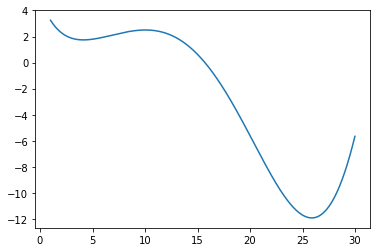

if initial guess = 0, x_min = 4.136288, y_min = 1.745268, nfev: 18, nit: 8
if initial guess = 2, x_min = 4.136276, y_min = 1.745268, nfev: 14, nit: 6
if initial guess = 4, x_min = 4.136257, y_min = 1.745268, nfev: 10, nit: 4
if initial guess = 6, x_min = 4.136290, y_min = 1.745268, nfev: 16, nit: 5
if initial guess = 8, x_min = 4.136289, y_min = 1.745268, nfev: 18, nit: 5
if initial guess = 10, x_min = 4.136300, y_min = 1.745268, nfev: 26, nit: 3
if initial guess = 12, x_min = 25.880192, y_min = -11.898895, nfev: 24, nit: 4
if initial guess = 14, x_min = 25.880193, y_min = -11.898895, nfev: 16, nit: 2
if initial guess = 16, x_min = 25.880199, y_min = -11.898895, nfev: 16, nit: 2
if initial guess = 18, x_min = 25.880199, y_min = -11.898895, nfev: 18, nit: 6
if initial guess = 20, x_min = 25.880187, y_min = -11.898895, nfev: 14, nit: 4
if initial guess = 22, x_min = 25.880194, y_min = -11.898895, nfev: 14, nit: 6
if initial guess = 24, x_min = 25.880195, y_min = -11.898895, nfev: 12, nit

In [77]:
plot_function(f)

def simple_minimize(f, initial_guess):
    res = optimize.minimize(f, initial_guess)
    print('if initial guess = %d, x_min = %f, y_min = %f, nfev: %d, nit: %d'%(initial_guess, res.x[0], res.fun, res.nfev, res.nit))
x_range = range(0, 31, 2)
for x in x_range:
    simple_minimize(f, x)

In [78]:
# Conclusion: oplimize.minimize finds local minimum that is nearest to the initial guess (?)
# but what is going on when initial guess = 13???

2. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. 
 Теперь измените начальное приближение на x=30.

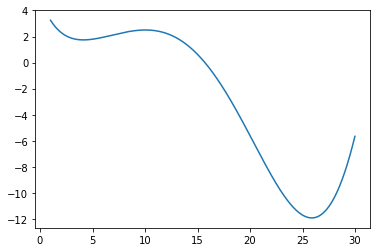

if initial guess = 2, x_min = 4.136276, y_min = 1.745268, nfev: 14, nit: 6
if initial guess = 30, x_min = 25.880193, y_min = -11.898895, nfev: 14, nit: 6


In [79]:
def BFGS_minimize(f, initial_guess):
    res = optimize.minimize(f, initial_guess, method='BFGS')
    print('if initial guess = %d, x_min = %f, y_min = %f, nfev: %d, nit: %d'%(initial_guess, res.x[0], res.fun, res.nfev, res.nit))
plot_function(f)
BFGS_minimize(f, 2)
BFGS_minimize(f, 30)

In [80]:
# Conclusion: BFGS finds local minimum 
# (of course, because it's a gradient descent method)

## Задача 2.  Глобальная оптимизация

 f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
 на промежутке [1, 30]
 
 - применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию scipy.optimize.differential_evolution

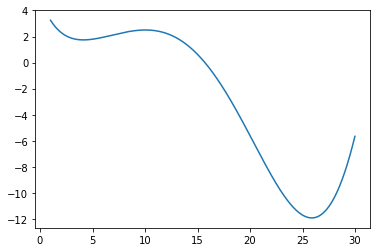

     fun: array([-11.89889467])
     jac: array([-1.77635669e-07])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([25.88019309])


RESULT:
 x_min = 25.880193, y_min = -11.898895


In [81]:
plot_function(f)

res = optimize.differential_evolution(f, [(1, 30)])
print(res)
print('\n\nRESULT:\n x_min = %f, y_min = %f'%(res.x[0], res.fun))


## Задача 3.  Минимизация негладкой функции

 h(x) = int(f(x)) на том же отрезке [1, 30]

 f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

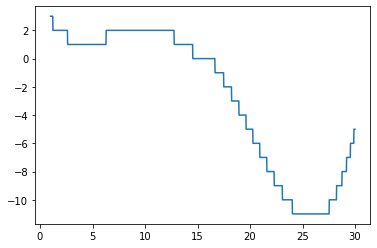

In [83]:
def nonsmooth_func(func):
    return func.astype(int)

def h(x):
    return nonsmooth_func(f(x))

plot_function(h)

Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30.

Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции.

In [88]:
print(optimize.minimize(h, 30, method='BFGS'))

for x in range(0, 31, 2):
    simple_minimize(h, x)

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])
if initial guess = 0, x_min = 0.000051, y_min = 4.000000, nfev: 22, nit: 1
if initial guess = 2, x_min = 2.000000, y_min = 2.000000, nfev: 2, nit: 0
if initial guess = 4, x_min = 4.000000, y_min = 1.000000, nfev: 2, nit: 0
if initial guess = 6, x_min = 6.000000, y_min = 1.000000, nfev: 2, nit: 0
if initial guess = 8, x_min = 8.000000, y_min = 2.000000, nfev: 2, nit: 0
if initial guess = 10, x_min = 10.000000, y_min = 2.000000, nfev: 2, nit: 0
if initial guess = 12, x_min = 12.000000, y_min = 2.000000, nfev: 2, nit: 0
if initial guess = 14, x_min = 14.000000, y_min = 1.000000, nfev: 2, nit: 0
if initial guess = 16, x_min = 16.000000, y_min = 0.000000, nfev: 2, nit: 0
if initial guess = 18, x_min = 18.000000, y_min = -2.000000, nfev: 2, nit: 0
if initial guess = 20, x_min = 20.000000, y_

In [85]:
optimize.differential_evolution(h, [(1, 30)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([25.72449328])

In [91]:
# Conclusion:
# we can see that BFGS (using gradient descent) does not suit 
# nonsmooth functions. Obviously because it uses derivative(производная)
# and as we know f'(x) = 0 (local extremum) when tangent(касательная) is
# parallel to x. When the function is not smooth we have too much local 
# extremums.
# But differential evolution suits nonsmooth functions so it skips all 
# local minimums and finds the global one